In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat['X']
X.shape

(50, 2)

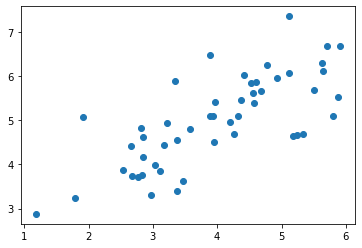

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 1. 对X去均值化

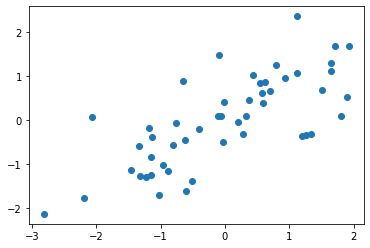

In [6]:
X_demean = X - np.mean(X,axis=0)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

## 2. caculate Cov matrix

In [7]:
C = X_demean.T@X_demean / len(X)
C

array([[1.34852518, 0.86535019],
       [0.86535019, 1.02641621]])

## 3. calculate eigenvalues & eigenvectors

In [8]:
U,S,V = np.linalg.svd(C)

In [9]:
S

array([2.06768062, 0.30726078])

In [10]:
U

array([[-0.76908153, -0.63915068],
       [-0.63915068,  0.76908153]])

In [11]:
U1 = U[:,0]

## 4. reduce dimention

In [12]:
X_reduction = X_demean@U1

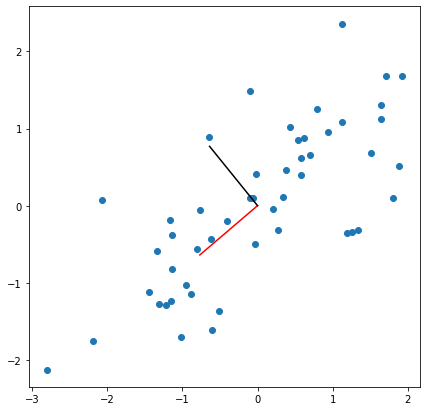

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,U1[0]],[0,U1[1]],c='r')
plt.plot([0,U[:,1][0]],[0,U[:,1][1]],c='k')
plt.show()
# U1 has a better performance than U2

## 5. back to the original dataset

In [18]:
X_restore = X_reduction.reshape(50,1)@U1.reshape(1,2) + np.mean(X,axis=0)

In [19]:
X_reduction.shape,U1.shape

((50,), (2,))

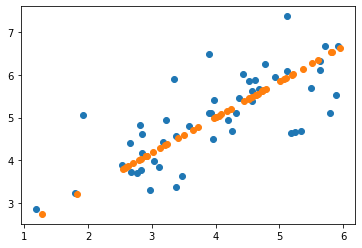

In [20]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.show()